<a href="https://colab.research.google.com/github/gabedewitt/dio-bootcamps/blob/main/analise_covid19_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análises COVID-19

## Digital Innovation One

#### Gabriel Sebastião

Vamos analisar as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo, utilizando um dataset atualizado, que contém informação até 16 de abril de 2022.


[Link do Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/covid-19)

<img src="https://storage.googleapis.com/kaggle-datasets-images/817708/1400261/b1759eeab49b45b224c465c2a97dcee4/dataset-cover.png" title="Imagem Kaggle" width="600"/>


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

### Importando o dataset e observando as colunas

In [2]:
path = 'countries-aggregated.csv'

df_2022 = pd.read_csv(path, parse_dates=['Date'])
df_2022

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


Observa-se que as colunas do dataset seguem padrão similar ao utilizado no notebook elaborado nas aulas gravadas.

Só se faz necessário alterar as colunas para que fiquem todas com nome minúsculo.

In [3]:
df_2022.columns = [col.lower() for col in df_2022.columns]

In [4]:
df_2022.dtypes

date         datetime64[ns]
country              object
confirmed             int64
recovered             int64
deaths                int64
dtype: object

Temos a informação de casos confirmados, recuperados e mortes junto do país e do dia registrado; logo será possível desenvolver a mesma análise do notebook original.

### Criando o dataset específico para o Brasil

In [5]:
df_2022.loc[df_2022.country == 'Brazil']

,date,country,confirmed,recovered,deaths
19584,2020-01-22,Brazil,0,0,0
19585,2020-01-23,Brazil,0,0,0
19586,2020-01-24,Brazil,0,0,0
19587,2020-01-25,Brazil,0,0,0
19588,2020-01-26,Brazil,0,0,0
...,...,...,...,...,...
20395,2022-04-12,Brazil,30184286,0,661741
20396,2022-04-13,Brazil,30210934,0,661904
20397,2022-04-14,Brazil,30234024,0,662043
20398,2022-04-15,Brazil,30247302,0,662154


Igual ao outro, Brasil também é acessado com 'Brazil', porém vendo o dataset observa-se que a informação de recuperados não existe, sempre é nula, e os casos confirmados e as mortes já estão agregadas em relação ao dia anterior.

In [6]:
# criando o dataset a partir do primeiro caso registrado
brasil = df_2022.loc[(df_2022.country == 'Brazil') & (df_2022.confirmed > 0)]

Como nesse dataset não temos a informação de estado ou região, acaba-se tendo a mesma situação que o dataset da aula gravada.

### Observando novos casos diários

In [7]:
# utilizando a mesma criação de novoscasos
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# Visualizando
px.line(brasil, x='date', y='novoscasos', title='Novos casos por dia',
       labels={'date': 'Data', 'novoscasos': 'Novos casos'})

Impressionante observar como comparado ao gráfico do notebook, que só tinha a informação da época (segunda quinzena de maio de 2020), nesse dataset existe a informação dos últimos 2 anos com o coronavírus, vemos que o número diário de casos tem uma sazonalidade, mas veio em decadência até final de 2021, contudo no início do ano o número de casos aumenta superando o máximo anterior e depois se estabiliza, possivelmente devido à vacinação da população.

Ainda há a questão do dia 21 de junho de 2020, que registrou número negativo de casos e será investigado.

In [9]:
brasil.loc[(brasil.date < '2020-06-23') & (brasil.date > '2020-06-17')]

,date,country,confirmed,recovered,deaths,novoscasos
19732,2020-06-18,Brazil,986750,534580,47946,25520
19733,2020-06-19,Brazil,1042809,551631,49118,56059
19734,2020-06-20,Brazil,1106332,576779,50100,63523
19735,2020-06-21,Brazil,1086536,588118,50683,-19796
19736,2020-06-22,Brazil,1114728,601736,51445,28192


Observando a sequência de dias, suspeito que a informação do dia 20 de casos confirmados está no dia 21 e vice-versa.

In [10]:
# Alterando os valores da coluna
brasil.confirmed.loc[brasil.date == '2020-06-20'] = 1086536
brasil.confirmed.loc[brasil.date == '2020-06-21'] = 1106332

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
# criando novamente a coluna novos casos
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# Visualizando 
px.line(brasil, x='date', y='novoscasos', title='Novos casos por dia',
       labels={'date': 'Data', 'novoscasos': 'Novos casos'})

Pronto, agora o gráfico não possui parte negativa!

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.date, y=brasil.confirmed, name='Acumulado de Casos', mode='lines',
              line=dict(color='steelblue'))
)
#Edita o layout
fig.update_layout(title='Casos de COVID-19 no Brasil',
                   xaxis_title='Data',
                   yaxis_title='Número de casos')
fig.show()

### Observando número de mortes confirmadas diárias

Criando o número de mortes confirmadas diárias, para comparar qual efeito a vacinação teve para reduzir o número de mortes quando os novos casos tiveram pico.

In [14]:
brasil['mortesconfirmadasdia'] = list(map(
    lambda x: 0 if (x==0) else brasil['deaths'].iloc[x] - brasil['deaths'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# Visualizando
px.line(brasil, x='date', y='mortesconfirmadasdia', title='Novas mortes confirmadas por dia',
       labels={'date': 'Data', 'mortesconfirmadasdia': 'Mortes confirmadas'})

In [16]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.date, y=brasil.deaths, name='Mortes', mode='lines',
              line=dict(color='red'))
)
#Edita o layout
fig.update_layout(title='Mortes por COVID-19 no Brasil',
                   xaxis_title='Data',
                   yaxis_title='Número de mortes')
fig.show()

Analisando o gráfico de mortes diárias e do acumulado, vemos que a covid teve picos de mortes diárias em abril de 2021 e graças à vacinação, mesmo com a explosão de casos vista no início de 2022 o pico do número de mortes no período foi menor do que o primeiro pico de junho de 2020. 

Porém são nos gráficos acumulados que vemos a magnitude dos números, mais de 30 milhões de casos e 600 mil mortes em decorrência da COVID 19 em território brasileiro.

## Taxa de crescimento

Calculando a taxa de crescimento desde o primeiro caso

In [17]:
# mesma função da aula gravada
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.date.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.date == data_inicio, variable].values[0]
    presente = data.loc[data.date == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [18]:
cresc_medio = taxa_crescimento(brasil, 'confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 2.23%.


Realizando agora a análise da taxa diária de crescimento temos:

In [19]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.date.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [20]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [21]:
tx_dia[:100]

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [22]:
primeiro_dia = brasil.date.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.date.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

Como foi discutido no vídeo após o crescimento inicial de novos casos, comparando-se com outros momentos da pandemia, a taxa de crescimento mal sai do 0 a partir de setembro de 2020.

# Predições

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisemos a série temporal.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

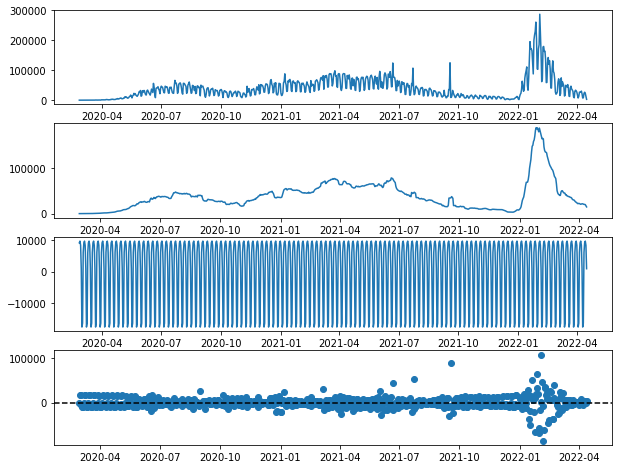

In [24]:
novoscasos = brasil.novoscasos
novoscasos.index = brasil.date

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Decompondo a série de casos confirmados

In [25]:
confirmados = brasil.confirmed
confirmados.index = brasil.date

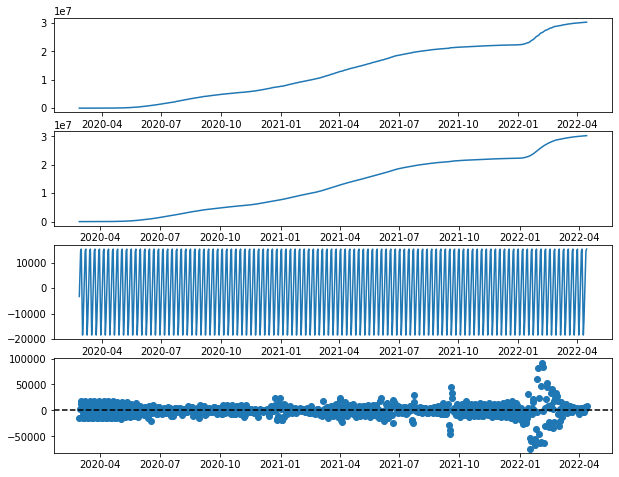

In [26]:
res2 = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmados.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Predizendo o número de casos confirmados com um AUTO-ARIMA

In [ ]:
!pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima

In [28]:
modelo = auto_arima(confirmados)

In [29]:
pd.date_range('2022-04-17', '2022-05-17')

DatetimeIndex(['2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', freq='D')

In [30]:
len(pd.date_range('2022-04-17', '2022-05-17'))

31

In [31]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2022-04-17', '2022-05-17'), y=modelo.predict(31), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 31 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

In [33]:
y=modelo.predict(31)
y

2022-04-17    3.025280e+07
2022-04-18    3.025912e+07
2022-04-19    3.027322e+07
2022-04-20    3.029456e+07
2022-04-21    3.031600e+07
2022-04-22    3.032949e+07
2022-04-23    3.033452e+07
2022-04-24    3.033703e+07
2022-04-25    3.034380e+07
2022-04-26    3.035833e+07
2022-04-27    3.037876e+07
2022-04-28    3.039872e+07
2022-04-29    3.041212e+07
2022-04-30    3.041811e+07
2022-05-01    3.042150e+07
2022-05-02    3.042873e+07
2022-05-03    3.044314e+07
2022-05-04    3.046274e+07
2022-05-05    3.048175e+07
2022-05-06    3.049495e+07
2022-05-07    3.050160e+07
2022-05-08    3.050590e+07
2022-05-09    3.051363e+07
2022-05-10    3.052783e+07
2022-05-11    3.054666e+07
2022-05-12    3.056489e+07
2022-05-13    3.057792e+07
2022-05-14    3.058513e+07
2022-05-15    3.059025e+07
2022-05-16    3.059845e+07
2022-05-17    3.061244e+07
Freq: D, dtype: float64

In [39]:
# Primeira diferença
y[1] - y[0]

6326.722286503762

In [40]:
# lista de novos casos diários segundo o modelo
list(map(
    lambda x: 0 if (x==0) else y[x] - y[x-1],
    np.arange(y.shape[0])
))

[0,
 6326.722286503762,
 14093.210694212466,
 21343.586594406515,
 21438.53177022189,
 13488.112217448652,
 5038.565566509962,
 2505.323018543422,
 6772.627103693783,
 14531.08748421073,
 20430.361594736576,
 19957.155796531588,
 13394.482758902013,
 5990.512563873082,
 3392.873812522739,
 7229.524843100458,
 14409.631552290171,
 19601.096510246396,
 19011.925009276718,
 13196.747235029936,
 6654.055931407958,
 4300.115271080285,
 7730.506049912423,
 14198.595604930073,
 18824.16438965127,
 18238.42177761346,
 13027.927104655653,
 7205.162346668541,
 5120.030172545463,
 8201.350504383445,
 13994.179415095598]

# Forecasting com Facebook Prophet

In [41]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 142 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6194462 sha256=702dd57c5b577e2bf0ce3725a8aa387f1b8380c5ae0dc36b64920d99ac5c1a8e
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [42]:
from fbprophet import Prophet

Como a realidade da pandemia é diferente e a predição de números menores que 30 milhões não condizem com a realidade, escolhi utilizar o prophet para observar
quando chegaríamos em 35 milhões de casos. E usando o último ano do número de 
casos.

In [72]:
#Utilizando o último ano do dataset
confirmados_recentes = confirmados.loc[confirmados.index >= '2021-04-01']

In [88]:
# preparando os dados
train = confirmados_recentes.reset_index()[:-5]
test = confirmados_recentes.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"date":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2021-07-30', '2021-08-21',
                                                   '2021-09-18', '2021-10-31',
                                                   '2021-10-05', '2022-01-11',
                                                   '2022-02-27', '2022-03-13',
                                                   '2022-03-20', '2022-03-30',
                                                   '2022-04-10'])

pop = 35000000
#pop = 215301104 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=800)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

Utilizando o prophet, temos que a marca de 35 milhões seria alcançada em junho de 2024.